The data set I have chosen for this challenge is called Safe Driver Prediction. This data set has bunch of features such as driver's age, marital status, years of driving experience and others. By using certain (or all) features, the outcome would be a binary 1 to indicate the driver is a safe driver, or 0 the driver is not a safe driver.<br>

This is an Exploratory Data Analysis or EDA exercise.<br>

Insurance companies can potentially use this data set and analysis to rate the insurance premiums policy holders.<br>

Our data set has the following features:

 - ID
 - target
 - Gender
 - EngineHP
 - credit_history
 - Years_Experience
 - annual_claims
 - Marital_Status
 - Vehical_type
 - Miles_driven_annually
 - size_of_family
 - Age_bucket
 - EngineHP_bucket
 - Years_Experience_bucket
 - Miles_driven_annually_bucket
 - credit_history_bucket
 - State


As I am not conducting an A/B test I will be not be running t-tests or p-tests. This challenge is to get the data ready for the analysis. So I will not be running the features through a test or train models.<br>
<br>
In this data set there a bunch of text based features ending with a "_bucket" in the name. These are being dropped for now as they do not add any significant value to our analysis.

For the rest of the features I will be analysing them using techniques such as pairwise plotting, correlation analysis, look for outliers and do a PCA if necessary.<br>

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xlrd

In [133]:
df = pd.read_excel('IT_3.xlsx').dropna()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30232 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30232 non-null int64
target                          30232 non-null int64
Gender                          30232 non-null object
EngineHP                        30232 non-null int64
credit_history                  30232 non-null int64
Years_Experience                30232 non-null int64
annual_claims                   30232 non-null int64
Marital_Status                  30232 non-null object
Vehicle_Type                    30232 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30232 non-null int64
Age_bucket                      30232 non-null object
EngineHP_bucket                 30232 non-null object
Years_Experience_bucket         30232 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30232 non-null object
State                           3

The data does not have any null values.<br>

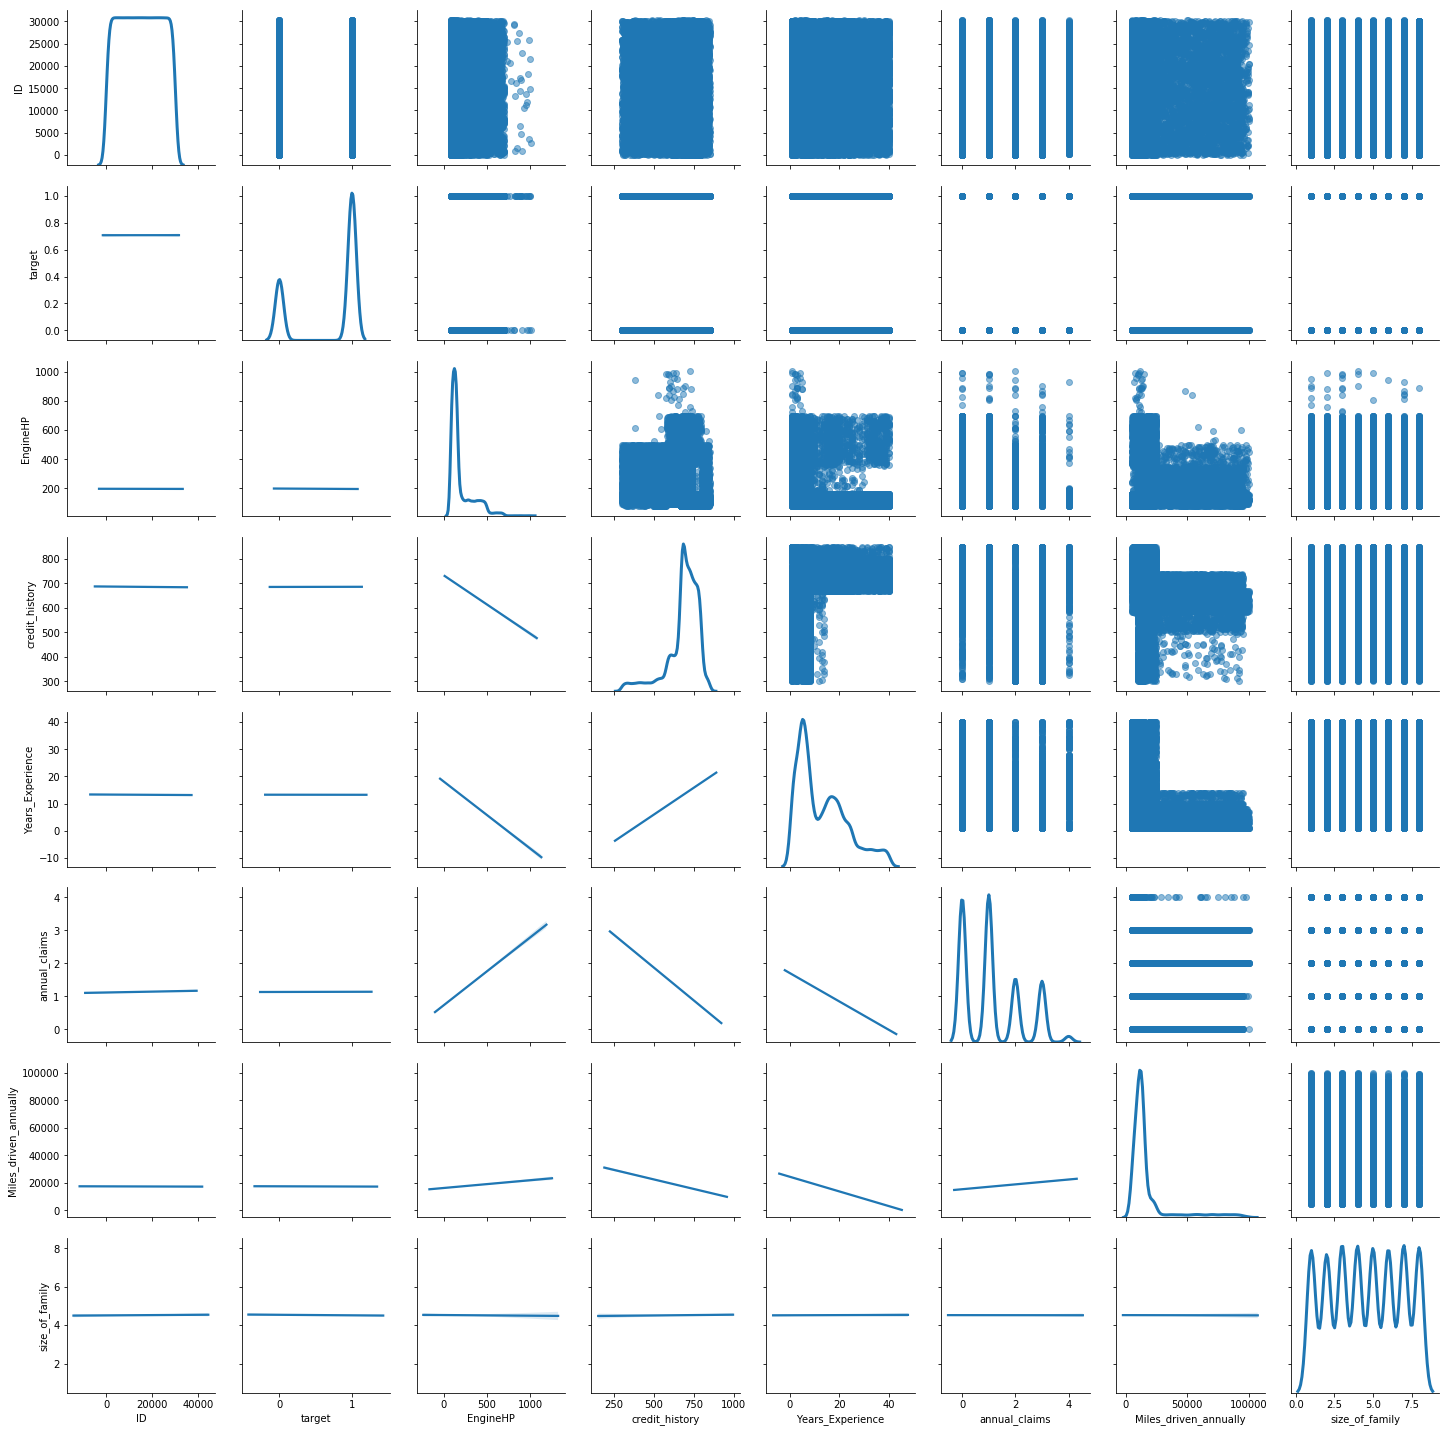

In [135]:
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Based on the above pairwise plots (or bi-variate analysis) we can see that **size_of_family** is pretty much flat and has no correlation with the other features. This fact is also corroborated by the correlation heatmap below. It is thus safe to drop **size_of_family**.<br>
<br>
The feature called **ID** is just an sequential indicator of each data row and does not play any role with the rest of features. Hence we will drop **ID** also.<br>
<br>
We will also drop all the columns that end with a **_bucket** as they do not add any significance to the analysis.

                             ID    target  EngineHP  credit_history  \
ID                     1.000000  0.000200 -0.001628       -0.007223   
target                 0.000200  1.000000 -0.009475        0.002063   
EngineHP              -0.001628 -0.009475  1.000000       -0.307921   
credit_history        -0.007223  0.002063 -0.307921        1.000000   
Years_Experience      -0.004094 -0.001041 -0.329856        0.410172   
annual_claims          0.010663  0.002084  0.251304       -0.377343   
Miles_driven_annually -0.002166 -0.003993  0.042690       -0.162552   
size_of_family         0.002890 -0.005456 -0.001953        0.003560   

                       Years_Experience  annual_claims  Miles_driven_annually  \
ID                            -0.004094       0.010663              -0.002166   
target                        -0.001041       0.002084              -0.003993   
EngineHP                      -0.329856       0.251304               0.042690   
credit_history                 0.410

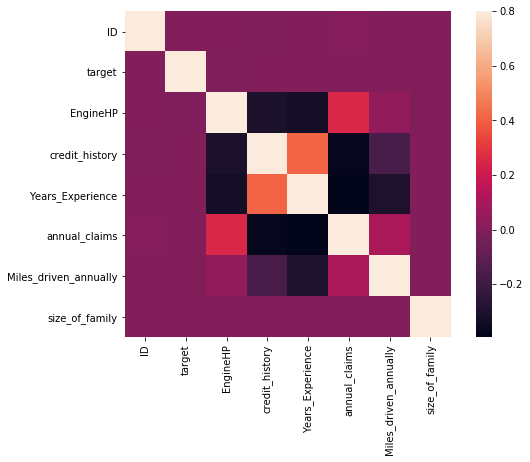

In [136]:
correlation_matrix = df.corr()
print(correlation_matrix)
#
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap using seaborn.
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

In [137]:
# Drop all columns ending with a "_bucket", and "size_of_family"
#
df.drop(['size_of_family', 'Age_bucket', 'EngineHP_bucket', 'Years_Experience_bucket', \
         'Miles_driven_annually_bucket', 'credit_history_bucket'], axis=1, inplace=True)
#
# Drop ID column also
#
df.drop(['ID'], axis=1, inplace=True)

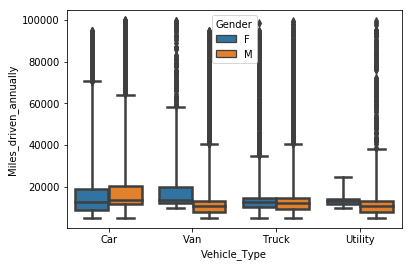

In [151]:
#
sns.boxplot(x='Vehicle_Type', y='Miles_driven_annually', hue='Gender', data=df, linewidth=2.5, whis=5)
plt.show()

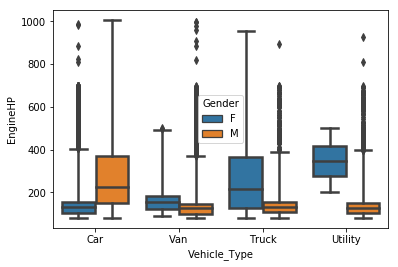

In [152]:
#
sns.boxplot(x='Vehicle_Type', y='EngineHP', hue='Gender', data=df, linewidth=2.5, whis=5)
plt.show()

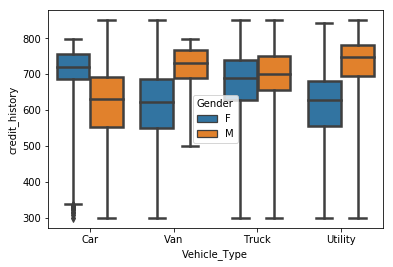

In [153]:
#
sns.boxplot(x='Vehicle_Type', y='credit_history', hue='Gender', data=df, linewidth=2.5, whis=5)
plt.show()